In [44]:
#importing all necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#check version
print("Pandas version: " + pd.__version__)


Matplotlib is building the font cache; this may take a moment.


Pandas version: 2.2.2


In [45]:
#load csv file with the correct delimiter 
file_path = 'csv/CTU-IoT-Malware-Capture-34-1conn.log.labeled copy.csv'
df = pd.read_csv(file_path, delimiter='|')

In [46]:
#take a look, displaying the first few rows to verify correct loading 
print("Initial data:") 
print(df.head())

Initial data:
             ts                 uid      id.orig_h  id.orig_p       id.resp_h  \
0  1.545404e+09   CrDn63WjJEmrWGjqf  192.168.1.195      41040  185.244.25.235   
1  1.545404e+09  CY9lJW3gh1Eje4usP6  192.168.1.195      41040  185.244.25.235   
2  1.545404e+09   CcFXLynukEDnUlvgl  192.168.1.195      41040  185.244.25.235   
3  1.545404e+09   CDrkrSobGYxHhYfth  192.168.1.195      41040  185.244.25.235   
4  1.545404e+09  CTWZQf2oJSvq6zmPAc  192.168.1.195      41042  185.244.25.235   

   id.resp_p proto service  duration orig_bytes  ... local_resp missed_bytes  \
0         80   tcp       -  3.139211          0  ...          -            0   
1         80   tcp       -         -          -  ...          -            0   
2         80   tcp       -         -          -  ...          -            0   
3         80   tcp    http  1.477656        149  ...          -         2896   
4         80   tcp       -  3.147116          0  ...          -            0   

       history ori

In [47]:
#display the initial columns
print("Initial columns:")
print(df.columns)

Initial columns:
Index(['ts', 'uid', 'id.orig_h', 'id.orig_p', 'id.resp_h', 'id.resp_p',
       'proto', 'service', 'duration', 'orig_bytes', 'resp_bytes',
       'conn_state', 'local_orig', 'local_resp', 'missed_bytes', 'history',
       'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',
       'tunnel_parents', 'label', 'detailed-label'],
      dtype='object')


In [48]:
#defined the required columns with desired labels
required_columns = {
    'ts': 'Timestamp', 
    'id_orig_h': 'Source_IP', 
    'id_resp_h': 'Destination_IP', 
    'id_orig_p': 'Source_Port', 
    'id_resp_p': 'Destination_Port', 
    'proto': 'Protocol', 
    'duration': 'Duration', 
    'orig_bytes': 'Bytes_Sent', 
    'resp_bytes': 'Bytes_Received', 
    'label': 'Label'
}

#addtional columns if available 
optional_columns = {
    'orig_country': 'Source_Country', 
    'resp_country': 'Destination_Country', 
    'detailed_label': 'Malware_Type', 
    'orig_pkts': 'Packets_Sent', 
    'resp_pkts': 'Packets_Received'
}


In [49]:
#combine required and optional columns
all_columns = {**required_columns, **optional_columns}

#filter the dataframe to keep only the relevant columns
filtered_columns = [col for col in all_columns.keys() if col in df.columns]
df_filtered = df[filtered_columns].copy()

#rename the columns
df_filtered.rename(columns=all_columns, inplace=True)

#drop rows with missing values in the required columns
required_column_labels = [all_columns[col] for col in required_columns.keys() if col in df.columns]
df_cleaned = df_filtered.dropna(subset=required_column_labels)

#display the first few rows of the cleaned dataframe
df_cleaned.head()

,Timestamp,Protocol,Duration,Bytes_Sent,Bytes_Received,Label,Packets_Sent,Packets_Received
0,1.545404e+09,tcp,3.139211,0,0,Benign,3,0
1,1.545404e+09,tcp,-,-,-,Benign,1,0
2,1.545404e+09,tcp,-,-,-,Benign,1,0
3,1.545404e+09,tcp,1.477656,149,128252,Benign,94,96
4,1.545404e+09,tcp,3.147116,0,0,Benign,3,0


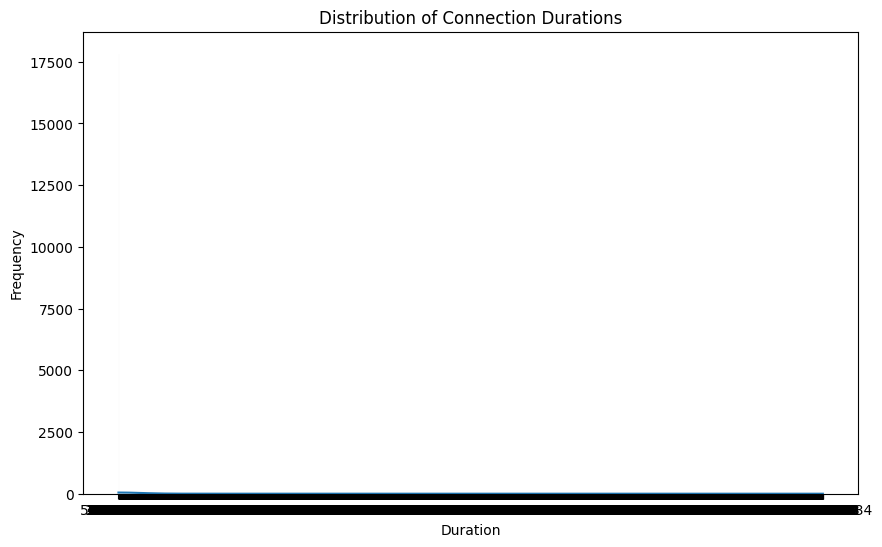

In [50]:
#ensure timestamp is in datetime format 
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])

#distribution of Connection Durations
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Duration'], kde=True, bins=30)
plt.title('Distribution of Connection Durations')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

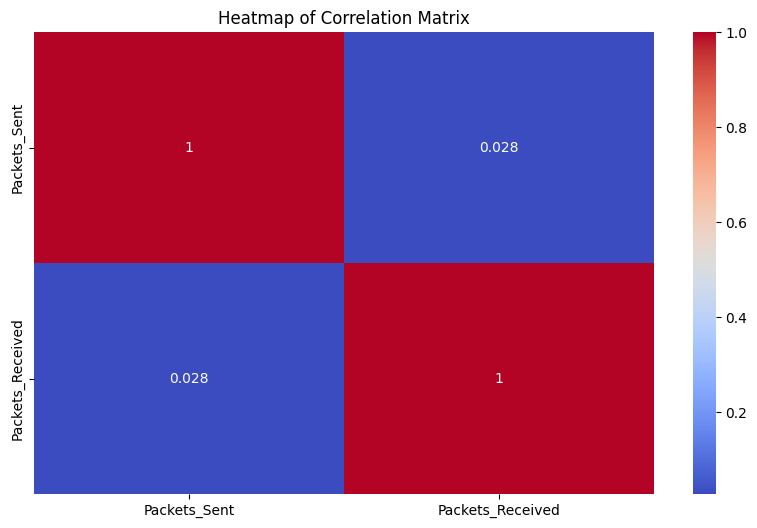

In [53]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation matrix
numeric_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_cleaned[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

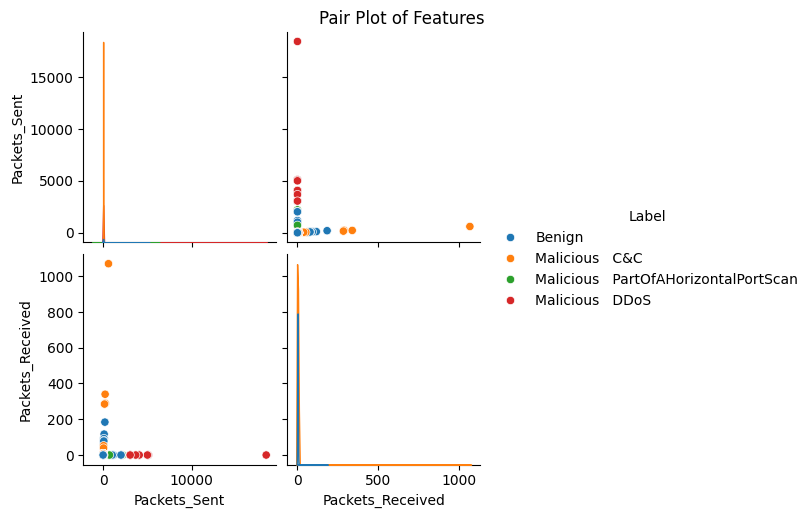

In [54]:
# Pair Plot
sns.pairplot(df_cleaned, hue='Label', diag_kind='kde')
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()

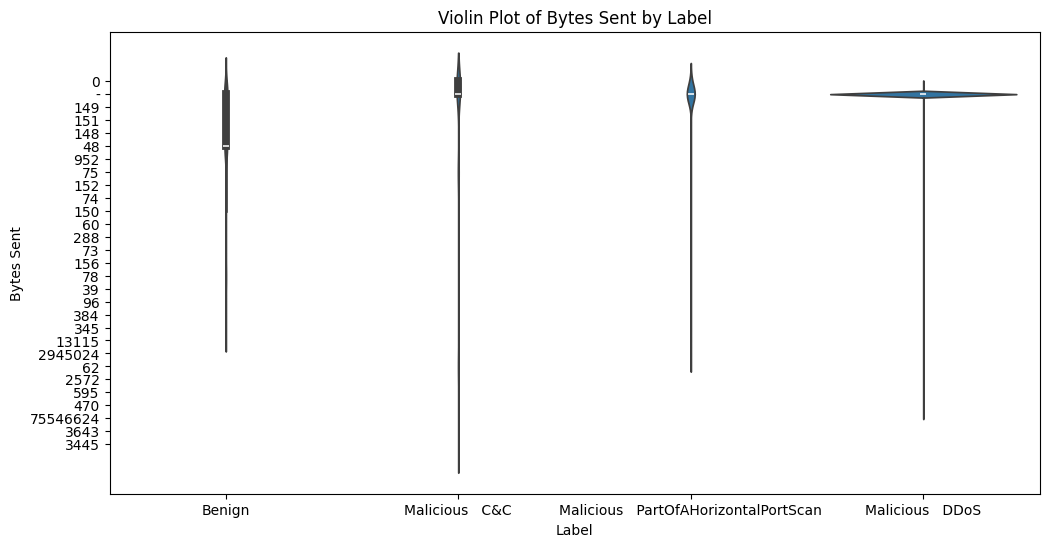

In [56]:
# Violin Plot of Bytes Sent by Label
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_cleaned, x='Label', y='Bytes_Sent')
plt.title('Violin Plot of Bytes Sent by Label')
plt.xlabel('Label')
plt.ylabel('Bytes Sent')
plt.show()


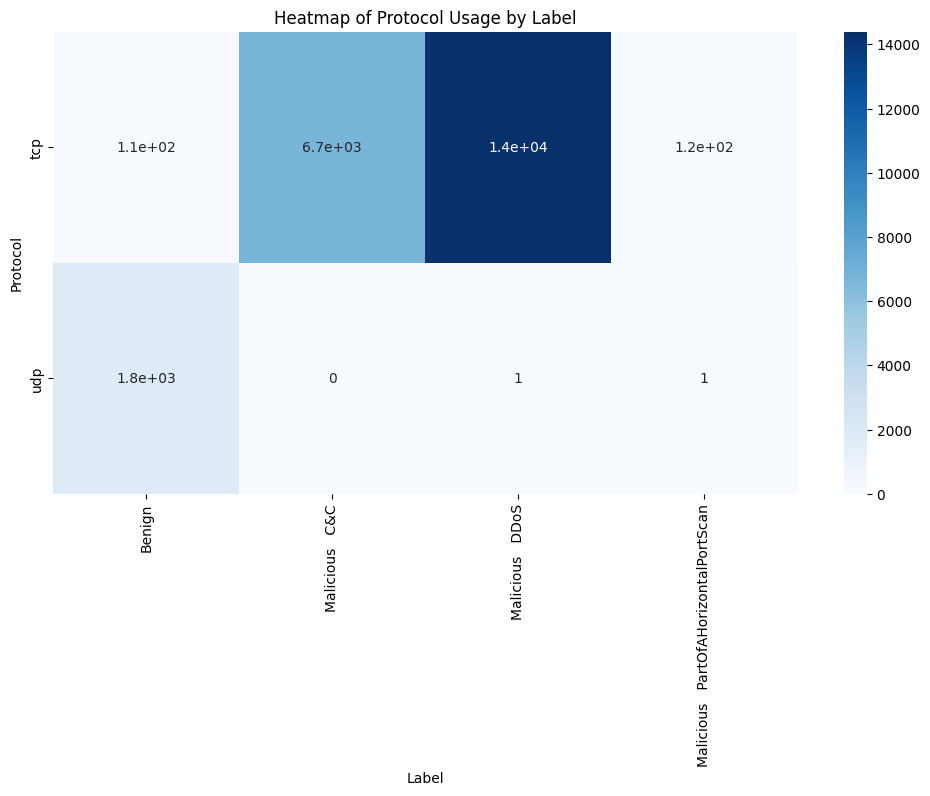

In [57]:
# Heatmap of Protocol Usage by Label
protocol_label_count = pd.crosstab(df_cleaned['Protocol'], df_cleaned['Label'])
plt.figure(figsize=(12, 6))
sns.heatmap(protocol_label_count, annot=True, cmap='Blues')
plt.title('Heatmap of Protocol Usage by Label')
plt.xlabel('Label')
plt.ylabel('Protocol')
plt.show()

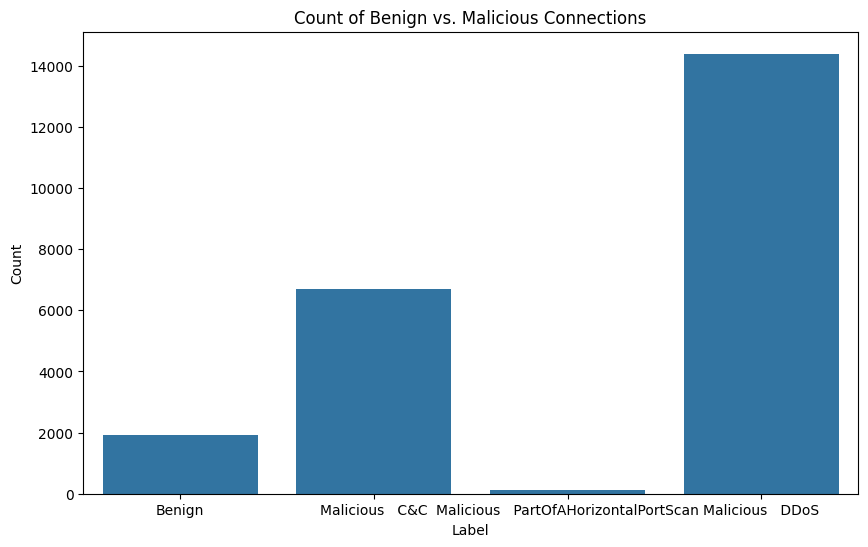

In [58]:
# Count Plot for Labels
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='Label')
plt.title('Count of Benign vs. Malicious Connections')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()